In [1]:
%matplotlib inline

import os.path

import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt

from IPython.display import display

In [2]:
DPI = 240
IMG_DIR = '../img'
def save_fig(fig, name):
    fig.savefig(os.path.join(IMG_DIR, name), dpi=DPI)

In [3]:
fnames = ('raw 200Hz',  '../data/2-microphone/2a-fake-200Hz.txt'), \
         ('raw 500Hz',  '../data/2-microphone/2a-fake-500Hz.txt'), \
         ('raw 1000Hz', '../data/2-microphone/2a-fake-1kHz.txt')

def read_csv(fname, label):
    return pd.read_csv(fname, comment='%', delimiter=';', names=['frequency', label], index_col=0, squeeze=True) 

data = pd.concat((read_csv(fname, label) for label, fname in fnames), axis=1)
data.head()

raw 200Hz  raw 500Hz  raw 1000Hz
frequency                                  
0.000000    0.507088   0.497403    0.498003
0.447035    0.507246   0.497346    0.498089
0.894070    0.000152   0.000131    0.000107
1.341105    0.000006   0.000050    0.000094
1.788139    0.000041   0.000066    0.000072

raw 200Hz     raw 500Hz    raw 1000Hz     LPF 200Hz  \
frequency                                                          
0.000000      0.507088  4.974030e-01  4.980034e-01  1.000000e+00   
357.627869    0.000003  6.838218e-06  3.567149e-06  5.461909e-02   
715.255737    0.000006  6.388748e-06  2.551194e-06  1.709396e-03   
1072.883606   0.000007  2.678792e-06  8.382029e-07  2.251059e-04   
1430.511475   0.000002  5.775704e-06  4.110429e-06  5.341869e-05   
1788.139343   0.000004  3.808999e-06  2.072947e-06  1.750424e-05   
2145.767212   0.000004  2.269030e-06  2.365505e-06  7.034560e-06   
2503.395081   0.000003  3.127788e-06  3.333692e-06  3.254640e-06   
2861.022949   0.000003  9.119286e-07  1.603391e-06  1.669334e-06   
3218.650818   0.000002  3.516206e-06  2.698117e-06  9.263618e-07   
3576.278687   0.000004  1.480432e-06  2.258700e-06  5.470074e-07   

                    200Hz  LPF 500Hz         500Hz  LPF 1000Hz        1000Hz  
frequency                                                                     
0.000000     5.070884e-01   1.000000  4.974030e-01    1.000000  4.980034e-01  
357.627869   1.491210e-07   0.982925  6.721459e-06    0.999983  3.567088e-06  
715.255737   1.096984e-08   0.164655  1.051939e-06    0.982925  2.507633e-06  
1072.883606  1.676166e-09   0.021978  5.887365e-08    0.575358  4.822667e-07  
1430.511475  1.248518e-10   0.005217  3.012953e-08    0.164655  6.768027e-07  
1788.139343  7.665858e-11   0.001709  6.511086e-09    0.054619  1.132225e-07  
2145.767212  2.572382e-11   0.000687  1.558752e-09    0.021978  5.198833e-08  
2503.395081  9.010144e-12   0.000318  9.941233e-10    0.010170  3.390440e-08  
2861.022949  4.451399e-12   0.000163  1.486634e-10    0.005217  8.364248e-09  
3218.650818  1.909708e-12   0.000090  3.180937e-10    0.002895  7.810696e-09  
3576.278687  2.352296e-12   0.000053  7.908272e-11    0.001709  3.861012e-09

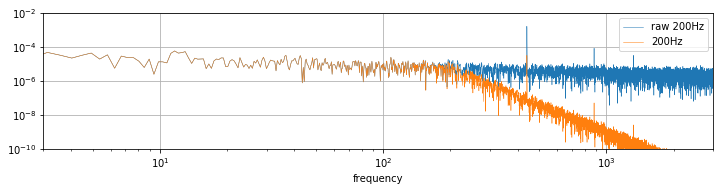

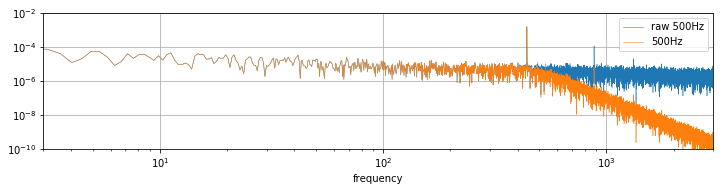

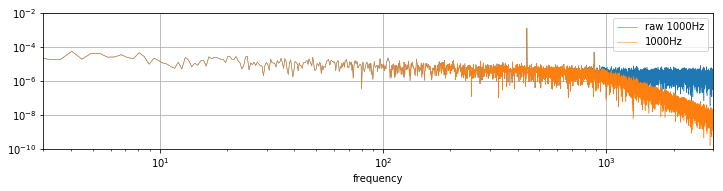

In [4]:
for f in 200, 500, 1000:
    b, a = signal.iirfilter(5, f, btype='low', analog=True)
    w, h = signal.freqs(b, a, data.index)
    f_Hz = '{:d}Hz'.format(f)
    data['LPF '+f_Hz] = abs(h)    
    data[f_Hz] = data['raw '+f_Hz] * data['LPF '+f_Hz]

    data[['raw '+f_Hz, f_Hz]].plot(loglog=True, figsize=(12,2.5), lw=.5, grid=True, xlim=(3e0,3e3), ylim=(1e-10, 1e-2))

data.iloc[::800]

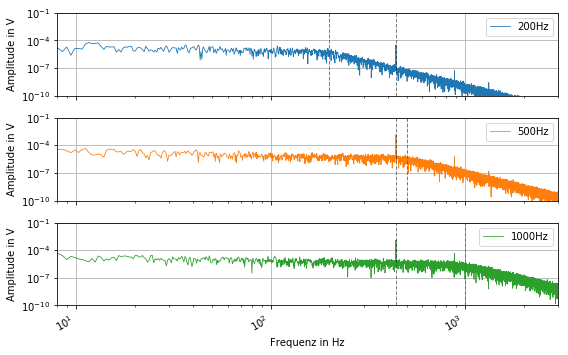

In [5]:
axes = data[['200Hz', '500Hz', '1000Hz']].plot(figsize=(8,5), loglog=True, subplots=True, sharex=True, lw=.8, grid=True, xlim=(8e0,3e3), ylim=(1e-10, 1e-1))

for f, ax in zip((200, 500, 1000), axes):
    ax.axvline(f, lw=1, ls='--', c='C3', alpha=.8)
    ax.axvline(440, lw=1, ls='--', c='k', alpha=.5)
    
    ax.set_xlabel("Frequenz in Hz")
    ax.set_ylabel("Amplitude in V")

plt.gcf().tight_layout()
save_fig(plt.gcf(), '2a-spektren')